<a href="https://colab.research.google.com/github/Kim-matthew-0422/chessdatascience/blob/main/00_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
#num of dims
scalar.ndim

0

In [4]:
vector = tf.constant([10,10])

In [5]:
vector.ndim

1

In [6]:
matrix = tf.constant([[10,7],
                     [7,10]])

In [7]:
matrix.ndim

2

In [8]:
another_matrix = tf.constant([[10.,7.],[10.,7.]], dtype = tf.float16)

In [9]:
tf.random.shuffle(matrix)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [10,  7]], dtype=int32)>

In [10]:
tf.random.set_seed(42)

In [11]:
import numpy as np
X = np.arange(-100,100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [13]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [14]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]


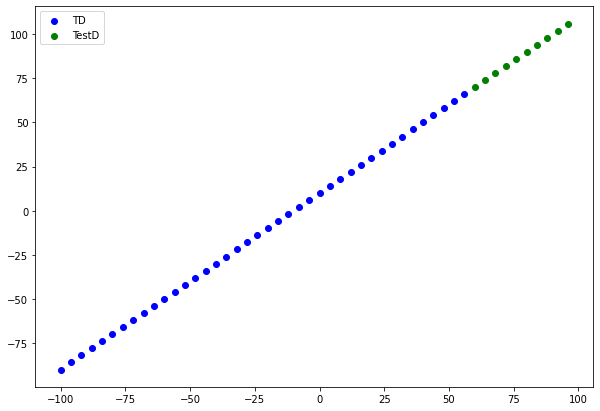

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, c = 'b',
 label = "TD")
plt.scatter(X_test, y_test, c = 'g', label = 'TestD')
plt.legend()

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=100, verbose = 0)

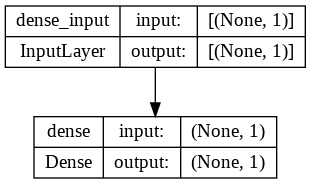

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [20]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 265ms/step


In [21]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [22]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label = 'Training data')
  plt.scatter(test_data, test_labels, c='g', label = "Testing data")
  plt.scatter(test_data, predictions, c='r', label = 'Predictions')
  plt.legend();

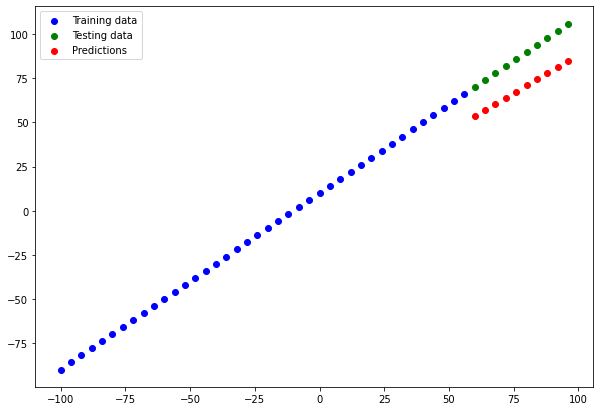

In [23]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds)

In [24]:
model.evaluate(X_test,y_test) 

1/1 [==============================] - 0s 454ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [25]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds.squeeze())

In [26]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [27]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [28]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [29]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 20ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 87ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 52ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 44ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 26ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] -

1/1 [==============================] - 0s 99ms/step


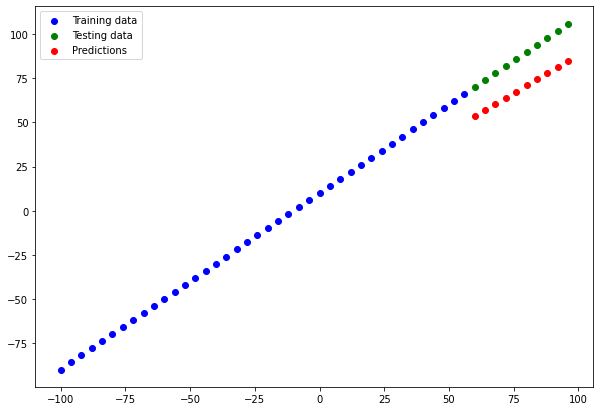

In [30]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

1/1 [==============================] - 0s 147ms/step


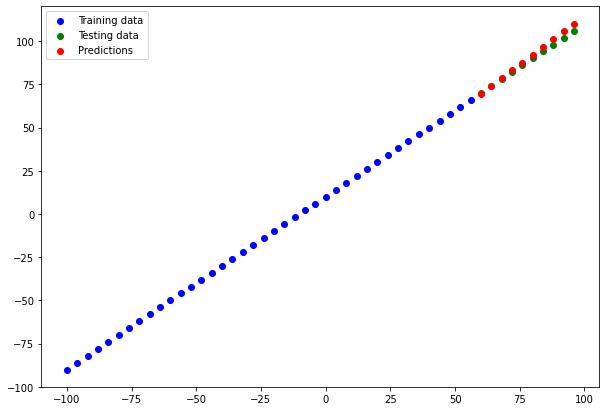

In [31]:

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)


In [32]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

In [33]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [34]:
model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2]]

In [35]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns = ['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770


In [36]:
model_2.save('bestest_everomfg_format')

In [37]:
!ls bestest_everomfg_format

assets	keras_metadata.pb  saved_model.pb  variables


In [38]:
model_2.save('best_HDF5_format.h5')

In [39]:
loaded_saved_model = tf.keras.models.load_model('bestest_everomfg_format')
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 482ms/step


True

In [41]:
from google.colab import files
files.download("bestest_everomfg_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [43]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [45]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [46]:
X.head(10)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0
7,37,27.740,3,1,0,1,0,0,1,0,0
8,37,29.830,2,0,1,1,0,1,0,0,0
9,60,25.840,0,1,0,1,0,0,1,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [48]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8868.5928 - mae: 8868.5928
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7694.1343 - mae: 7694.1343
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.9141 - mae: 7595.9141
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7735.9126 - mae: 7735.9126

In [49]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

In [50]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [51]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

Text(0, 0.5, 'epochs')

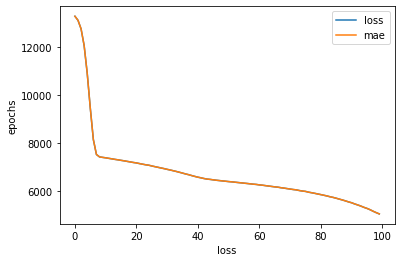

In [53]:
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('epochs')

In [57]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [58]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3167.3687 - mae: 3167.3687


(3167.36865234375, 3167.36865234375)

In [59]:
history_3 = insurance_model_2.fit(X_train, y_train, epochs = 300, verbose = 0)

Text(0.5, 0, 'epochs')

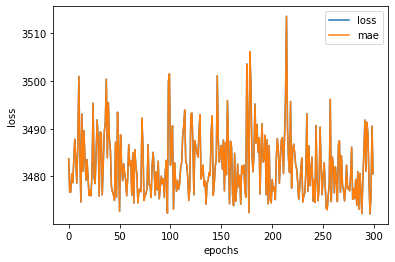

In [60]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [71]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
yolo = [20, 'male', 38.666, 5, 'no', 'southeast',]

In [87]:
wtf = pd.DataFrame([yolo], columns = ['age','sex','bmi','children','smoker','region'])

In [74]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)






In [88]:
wtf.head()

,age,sex,bmi,children,smoker,region
0,20,male,38.666,5,no,southeast


In [89]:
wtf_normal = ct.transform(wtf)

In [75]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose = 0)

In [76]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5776 - mae: 3171.5776


In [77]:
insurance_model_2_mae, insurance_model_3_mae

(3167.36865234375, 3171.57763671875)

In [90]:
insurance_model_3.predict(wtf_normal)

1/1 [==============================] - 0s 162ms/step


array([[3515.5786]], dtype=float32)

In [96]:
y_pred = insurance_model_3.predict(X_test_normal)

9/9 [==============================] - 0s 5ms/step


In [97]:
y_pred

array([[ 9391.207  ],
       [ 6092.602  ],
       [43942.977  ],
       [ 9336.297  ],
       [31657.498  ],
       [ 5780.3555 ],
       [ 1149.8937 ],
       [13567.978  ],
       [ 3621.7583 ],
       [10289.285  ],
       [35072.938  ],
       [ 7830.0356 ],
       [ 4309.048  ],
       [40360.4    ],
       [42839.953  ],
       [40055.344  ],
       [10740.186  ],
       [39978.87   ],
       [ 8801.093  ],
       [38299.195  ],
       [ 4030.5437 ],
       [ 8089.8296 ],
       [  722.37244],
       [ 3131.049  ],
       [10972.167  ],
       [11376.095  ],
       [12417.89   ],
       [ 4904.485  ],
       [ 9999.711  ],
       [  533.74963],
       [ 8369.495  ],
       [11826.315  ],
       [ 2018.2053 ],
       [ 5190.0728 ],
       [ 2987.6072 ],
       [ 8869.8    ],
       [ 1907.0128 ],
       [ 7993.9307 ],
       [40984.6    ],
       [36508.832  ],
       [ 3094.7412 ],
       [ 2357.721  ],
       [11781.665  ],
       [11604.154  ],
       [ 5652.3467 ],
       [11

In [100]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

AttributeError: ignored

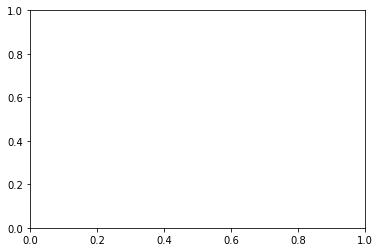

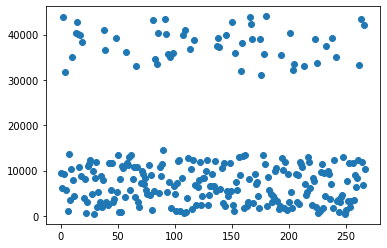

In [109]:
plt.scatter(range(len(y_pred)), y_pred)

In [110]:
plt.show()

In [113]:
hp = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

57026/57026 [==============================] - 0s 0us/step


In [120]:
(X_train, y_train), (X_test, y_test) = hp

In [125]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

ValueError: ignored

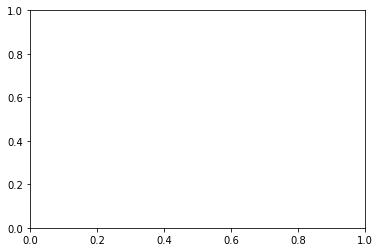

In [123]:
plt.scatter(X_train, y_train, color = 'red')

,0,1
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,...","[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."
1,"[[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0...","[7.2, 18.8, 19.0, 27.0, 22.2, 24.5, 31.2, 22.9..."
